In [1]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [2]:
### ---- Read Data Files ---- ###

# Read in training data csv file and check head
r_Train = pd.read_csv("trainingData.csv", sep=",")
r_Validate = pd.read_csv("validationData.csv", sep=",")

In [3]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = r_Train.loc[r_Train['BUILDINGID'] == 0]
building_1 = r_Train.loc[r_Train['BUILDINGID'] == 1]
building_2 = r_Train.loc[r_Train['BUILDINGID'] == 2]


building_0_val = r_Validate.loc[r_Validate['BUILDINGID'] == 0]
building_1_val = r_Validate.loc[r_Validate['BUILDINGID'] == 1]
building_2_val = r_Validate.loc[r_Validate['BUILDINGID'] == 2]

Text(0.5, 1.0, 'Buildings by Longitude and Latitude')

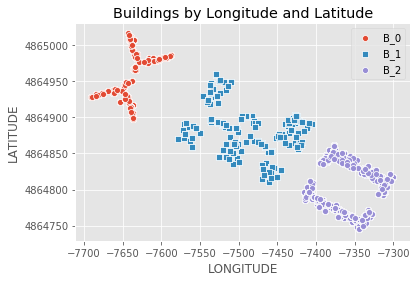

In [4]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")

In [5]:
building_0['FLOOR'].value_counts()

2    1443
3    1391
1    1356
0    1059
Name: FLOOR, dtype: int64

In [6]:
#building_0['FLOOR'].describe()

In [7]:
## Let's run an aggregate function on entire dataframe
building_0.median()
building_0.var()
building_0.max()
building_0.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,5249.000000,5249.000000,5249.0,5249.0,5249.0,5249.0,5249.000000,5249.000000,5249.000000,5249.0,...,5249.0,5249.000000,5.249000e+03,5249.000000,5249.0,5249.000000,5249.000000,5249.000000,5249.000000,5.249000e+03
mean,99.330158,99.319870,100.0,100.0,100.0,100.0,79.997142,95.665079,79.846256,100.0,...,100.0,-7639.311545,4.864958e+06,1.603163,0.0,167.989903,1.994475,5.785673,13.521433,1.370588e+09
std,11.420280,11.285783,0.0,0.0,0.0,0.0,56.996244,28.233764,56.475653,0.0,...,0.0,24.950489,3.268504e+01,1.083094,0.0,51.158690,0.074131,4.995880,0.499588,4.862150e+05
min,-97.000000,-90.000000,100.0,100.0,100.0,100.0,-99.000000,-97.000000,-98.000000,100.0,...,100.0,-7691.338400,4.864898e+06,0.000000,0.0,101.000000,1.000000,1.000000,13.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-7648.530400,4.864931e+06,1.000000,0.0,118.000000,2.000000,1.000000,13.000000,1.370013e+09
50%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-7639.350000,4.864950e+06,2.000000,0.0,140.000000,2.000000,1.000000,14.000000,1.370879e+09
75%,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-7631.894900,4.864983e+06,3.000000,0.0,218.000000,2.000000,11.000000,14.000000,1.371051e+09
max,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,...,100.0,-7587.041400,4.865017e+06,3.000000,0.0,241.000000,2.000000,11.000000,14.000000,1.371057e+09


In [8]:
b0 = building_0.drop_duplicates()

#print("Dataframe without Duplicates:\n\n", b0.head(2))

In [9]:
b0_val = building_0_val.drop_duplicates()
#print("Dataframe without Duplicates:\n\n", b0_val.head(2))

In [10]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Train = b0.copy(); 
c_Train.columns
c_Train.shape 

(5246, 529)

In [11]:
## Make a copy of the de duplicated data sets and check shape and columns

c_Val = b0_val.copy();
c_Val.columns
c_Val.shape

(536, 529)

In [12]:
## Here I am changing the data type of the column names from Index to List

wap_names = c_Train.columns[0:520].tolist()
wap_names_val = c_Val.columns[0:520].tolist()

In [13]:
var_0_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) == 0,:]

In [14]:
var_1_filter = c_Train.loc[c_Train.loc[:,wap_names].var(axis=1) != 0,:]

In [15]:
var_0_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) == 0,:]

In [16]:
var_1_filter_val = c_Val.loc[c_Val.loc[:,wap_names].var(axis=1) != 0,:]

In [17]:
## Rename the main dataframe for simplicity

v1 = var_1_filter.copy()

In [18]:
## Subsetting the data we need into two data frames
# DF 1 shows all columns non wap

v1_waps = v1.iloc[:,0:520]

In [19]:
## Subsetting the data we need into two data frames
# DF 2 shows all columns non wap
v1_notwaps = v1.iloc[:, 520:529]

In [20]:
v1_notwaps.columns

Index(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object')

In [21]:
## Doing a precheck on values before normalising the WAPs by row 
v1_waps.max()
v1_waps.min()

WAP001    -97
WAP002    -90
WAP003    100
WAP004    100
WAP005    100
         ... 
WAP516    100
WAP517    100
WAP518    100
WAP519    -97
WAP520    100
Length: 520, dtype: int64

In [22]:
## Subset the dataframe based on User

v1.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [23]:
v1["USERID"].value_counts()

1     2734
11    2511
Name: USERID, dtype: int64

In [24]:
b0_u11 = v1.loc[v1['USERID'] == 11]
b0_u1 = v1.loc[v1['USERID'] == 1]

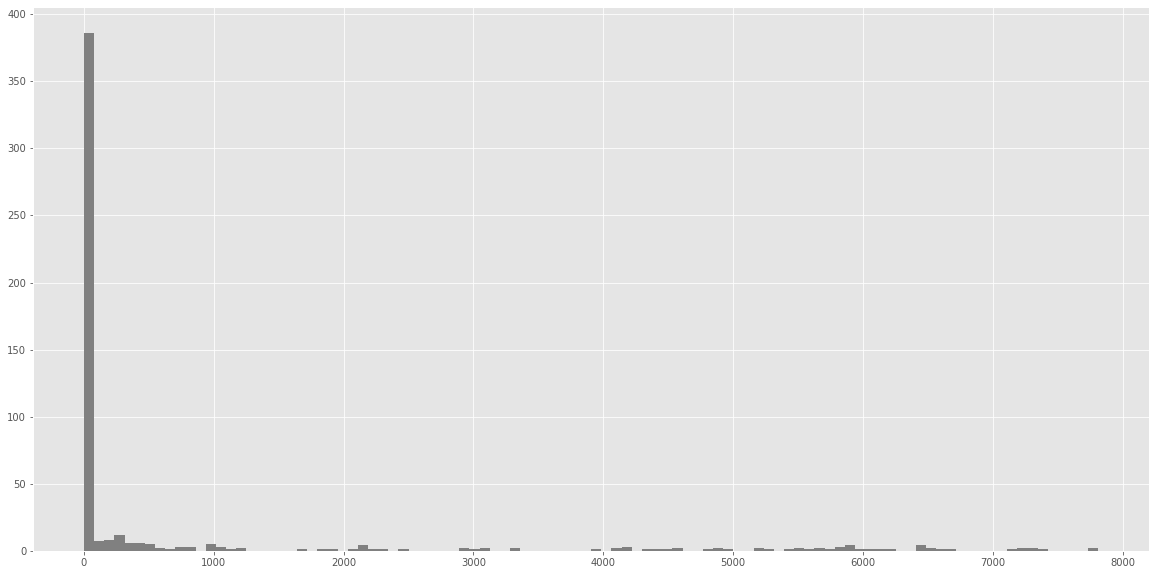

In [25]:
b0_u11[wap_names].var().hist(bins=100, color="grey")

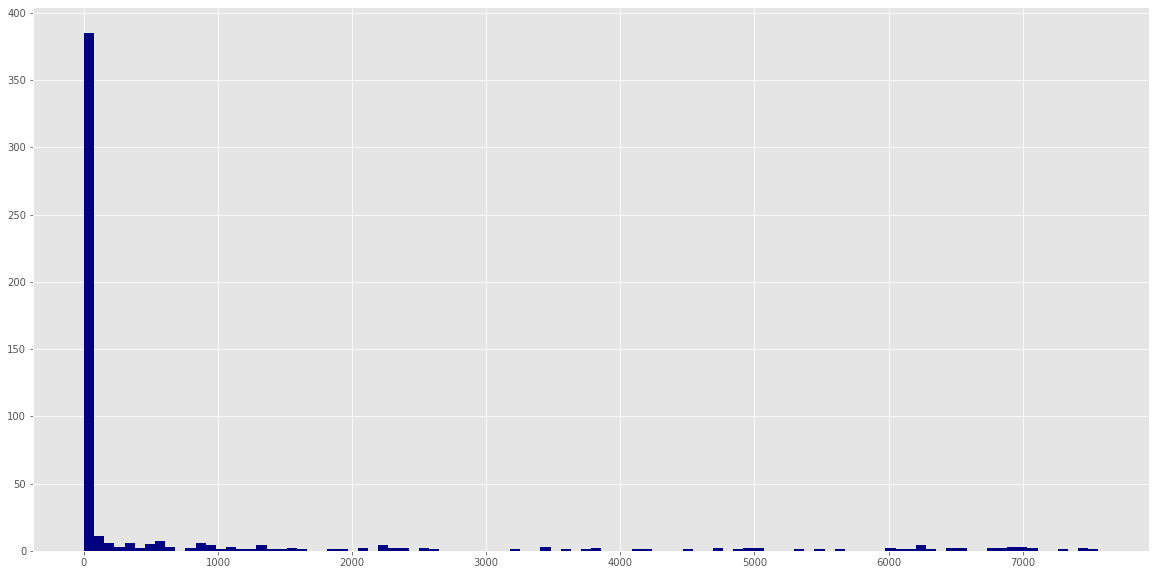

In [26]:
b0_u1[wap_names].var().hist(bins=100, color='navy')

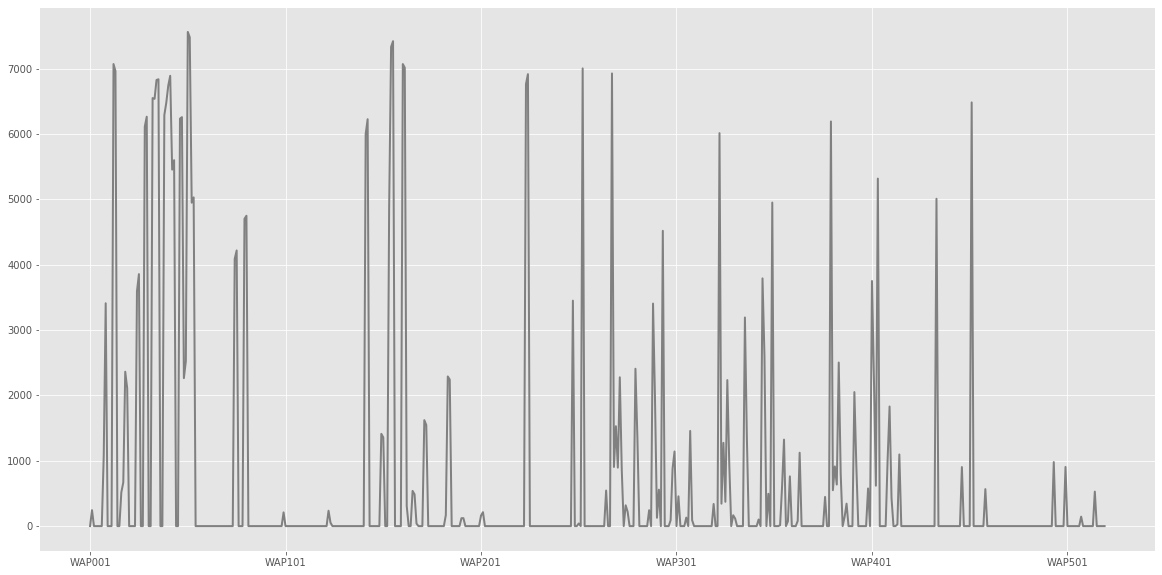

In [27]:
 b0_u1.iloc[:,0:520].var().plot(linewidth=2, color="grey")

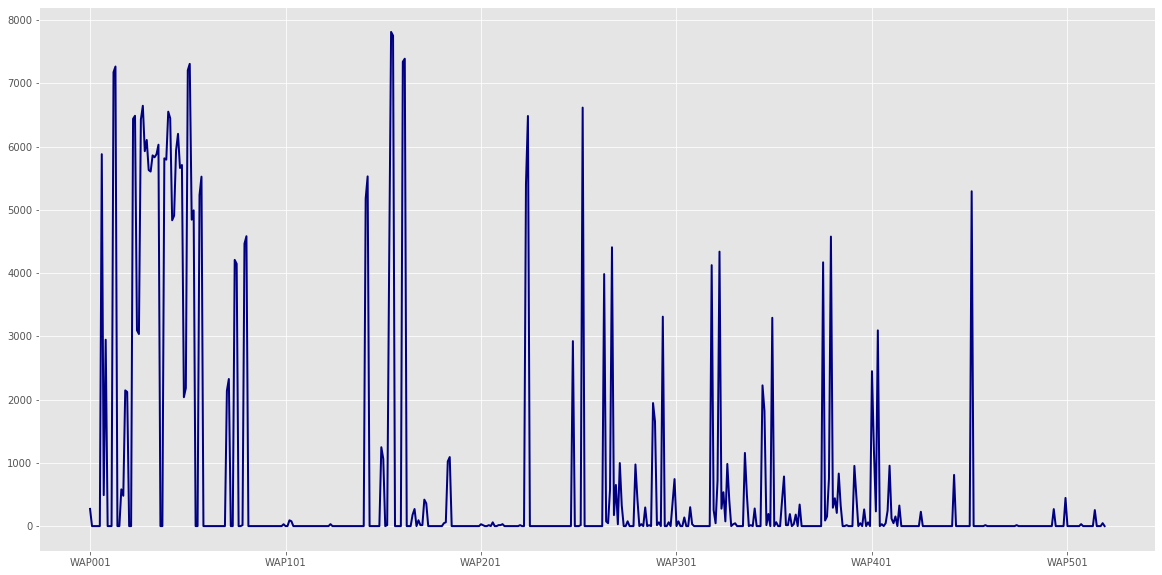

In [28]:
 b0_u11.iloc[:,0:520].var().plot(linewidth=2, color="navy")

In [30]:
## Using Scikitlearn to perform normalisation 
# Alternative 1

from sklearn.preprocessing import Normalizer
X = b0_u1.iloc[:,0:520]
transformer = Normalizer().fit(X) # fit does nothing in this case
transformer
transformer.transform(X)

array([[0.04406906, 0.04406906, 0.04406906, ..., 0.04406906, 0.04406906,
        0.04406906],
       [0.04415806, 0.04415806, 0.04415806, ..., 0.04415806, 0.04415806,
        0.04415806],
       [0.0441046 , 0.0441046 , 0.0441046 , ..., 0.0441046 , 0.0441046 ,
        0.0441046 ],
       ...,
       [0.04414657, 0.04414657, 0.04414657, ..., 0.04414657, 0.04414657,
        0.04414657],
       [0.04421392, 0.04421392, 0.04421392, ..., 0.04421392, 0.04421392,
        0.04421392],
       [0.04426973, 0.04426973, 0.04426973, ..., 0.04426973, 0.04426973,
        0.04426973]])

In [31]:
## Here Iam selecting the User 11 fields not relating to WAP

Y = b0_u1.iloc[:,520:529]

In [32]:
Y 

,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
15756,-7685.7235,4.864930e+06,0,0,218,2,1,14,1370878645
15760,-7684.2824,4.864932e+06,0,0,216,2,1,14,1370878684
15761,-7682.5438,4.864932e+06,0,0,215,2,1,14,1370878706
15762,-7676.6271,4.864934e+06,0,0,214,2,1,14,1370878767
15763,-7680.1346,4.864931e+06,0,0,237,2,1,14,1370878738
...,...,...,...,...,...,...,...,...,...
18492,-7661.4735,4.864934e+06,3,0,228,2,1,14,1371056317
18493,-7656.7628,4.864938e+06,3,0,236,2,1,14,1371056344
18494,-7646.3076,4.864932e+06,3,0,235,2,1,14,1371056397
18496,-7644.9453,4.864949e+06,3,0,230,2,1,14,1371056496


In [33]:
## Turn the normalised X array into a DataFrame

X_df = pd.DataFrame(X)
X_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,2734.0,2734.000000,2734.0,2734.0,2734.0,2734.0,2734.0,2734.000000,2734.000000,2734.0,...,2734.0,2734.0,2734.0,2734.0,2734.000000,2734.0,2734.0,2734.0,2734.0,2734.0
mean,100.0,98.694221,100.0,100.0,100.0,100.0,100.0,94.021580,78.034382,100.0,...,100.0,100.0,100.0,100.0,97.096562,100.0,100.0,100.0,100.0,100.0
std,0.0,15.612842,0.0,0.0,0.0,0.0,0.0,32.795755,58.405332,0.0,...,0.0,0.0,0.0,0.0,22.973684,0.0,0.0,0.0,0.0,0.0
min,100.0,-90.000000,100.0,100.0,100.0,100.0,100.0,-90.000000,-91.000000,100.0,...,100.0,100.0,100.0,100.0,-88.000000,100.0,100.0,100.0,100.0,100.0
25%,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,...,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0
50%,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,...,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0
75%,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,...,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0
max,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,...,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0


In [34]:
## Quick check on shape to two dataframes before rejoining

In [35]:
Y.shape

(2734, 9)

In [36]:
## Merge the normalised X array and remaining columns into a DataFrame

merged_df = pd.merge(X_df, Y, left_index = True, right_index = True)

In [37]:
normed_df = merged_df.copy()

In [38]:
normed_df = merged_df.copy()

In [39]:
normed_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

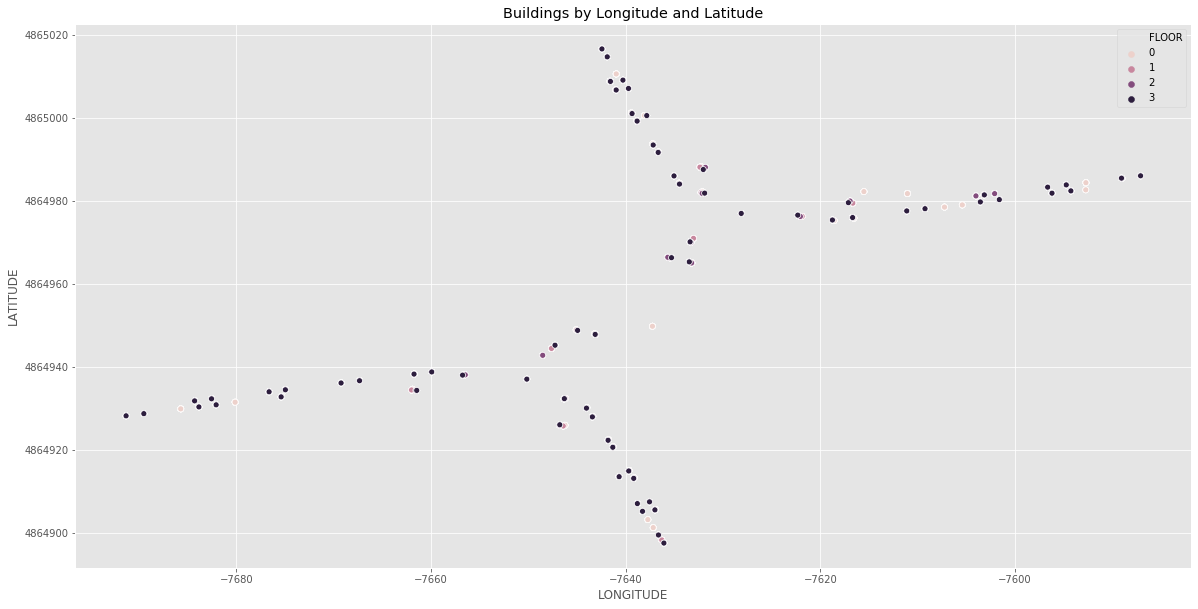

In [40]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Using the normalised and merged dataframe
plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=normed_df, hue = "FLOOR", marker = "o") # Can specify which floors using operators
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Buildings by Longitude and Latitude")
plt.savefig("B0 user 1.png")

In [41]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

## Start making selections by User and Phone ID

In [42]:
## Create some new dataframe groupings for Users, Phones and Combination

#user_group = normed_df.groupby(["USERID"]).count()
#phone_group = normed_df.groupby(["PHONEID"]).count()
#phone_user_group = normed_df.groupby(["PHONEID", "USERID"]).count()

In [43]:
## Let's filter the WAPs by User
normed_df['USERID']

15756    1
15760    1
15761    1
15762    1
15763    1
        ..
18492    1
18493    1
18494    1
18496    1
18497    1
Name: USERID, Length: 2734, dtype: int64

In [44]:
normed_df['PHONEID']

15756    14
15760    14
15761    14
15762    14
15763    14
         ..
18492    14
18493    14
18494    14
18496    14
18497    14
Name: PHONEID, Length: 2734, dtype: int64

In [45]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES  ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = (normed_df.iloc[:, 0:520]) # Independent variable
y = (normed_df.loc[:, "FLOOR"]) #  Target column
#X.shape
#y.shape

In [46]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
#### ---- ERROR METRICS FOR REGRESSION ---- ####

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [48]:
#### ----  REGRESSION 1: GRADIENT BOOSTED TREES ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)


## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)

In [49]:
## Assigning error metrics

mse_gbt = round(mean_squared_error(y_test, y_pred), 4)
rmse_gbt = round(np.sqrt(mse_gbt), 4)
mae_gbt = round(mean_absolute_error(y_test, y_pred), 4)
r2_gbt = round(r2_score(y_test, y_pred), 4)

In [50]:
## Printing out errors in DataFrame format

model_name = "Gradient Boosted Trees"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
    f"-----------------------------------------------------\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse_gbt,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse_gbt,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae_gbt,
      "\n\n", f"The Correlation (r2) is:\n",r2_gbt,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Gradient Boosted Trees 

-----------------------------------------------------

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 0.0422 

 The Root Mean Squared Error (RMSE) is:
 0.2054 

 The Mean Absolute Error (MAE) is:
 0.1598 

 The Correlation (r2) is:
 0.9618 

 -----------------------------------------------------



In [51]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual



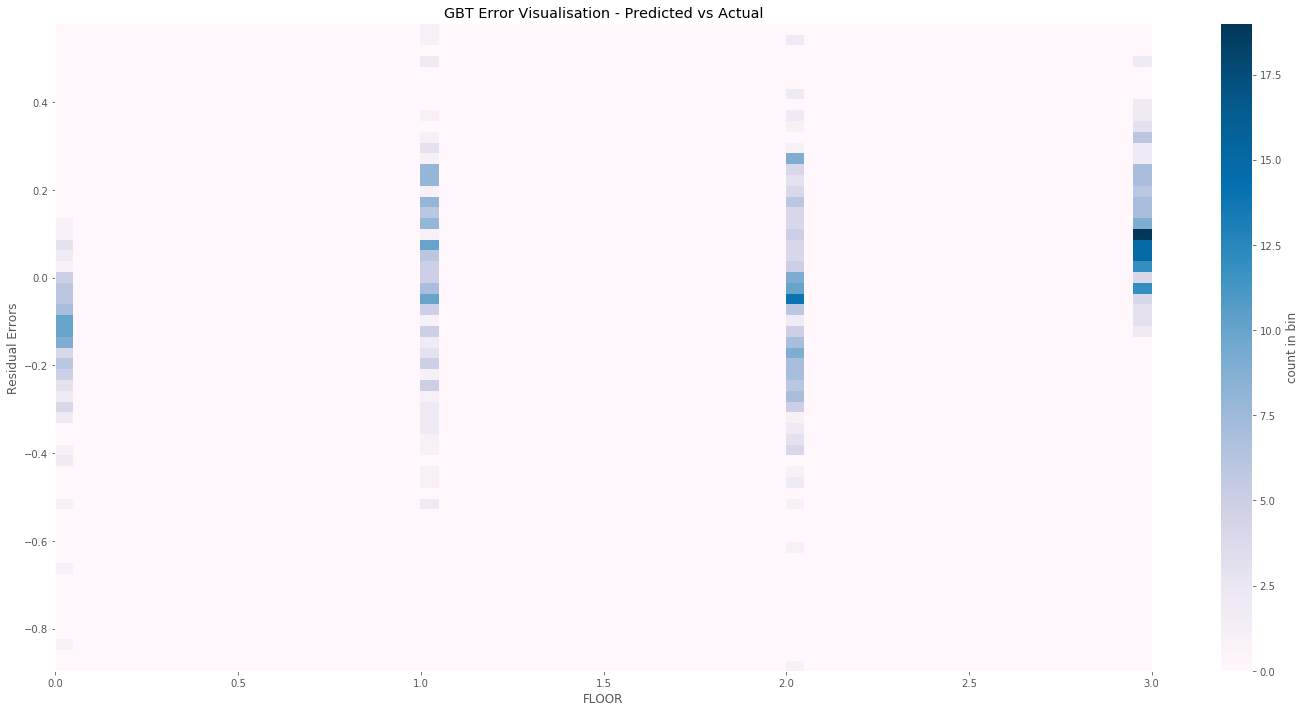

In [52]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt B0 floor.png")

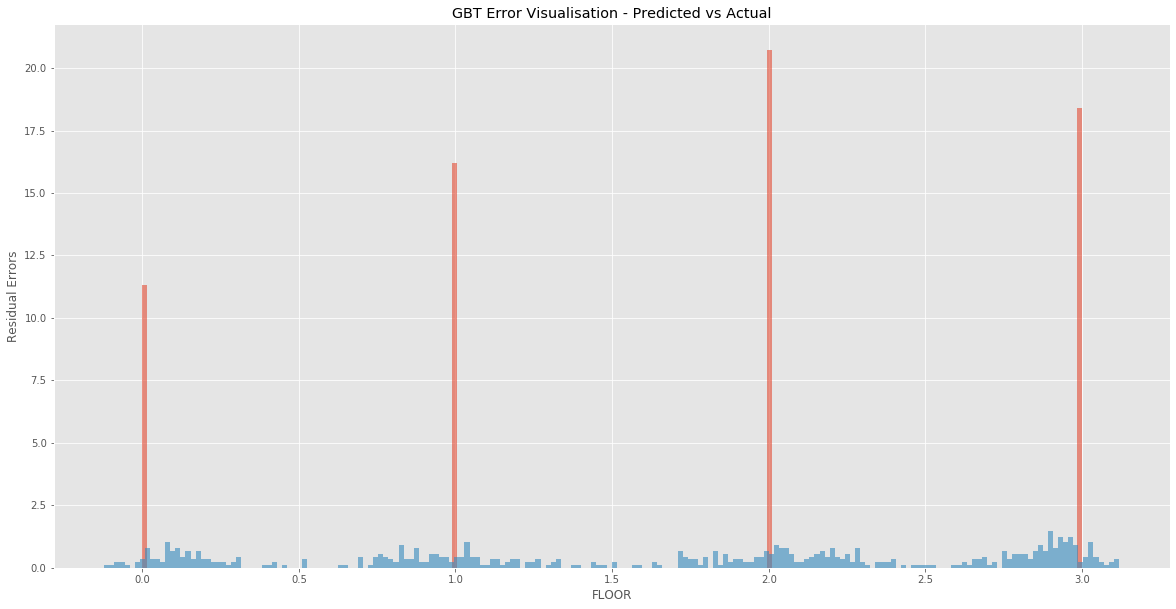

In [53]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("GBT Error Visualisation - Predicted vs Actual")
plt.xlabel("FLOOR")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist Building 0 - Floor.png")

In [54]:
## Let's restart the modelling with classification

In [55]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES FOR BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = normed_df.iloc[:, 0:520] # WAP columns
y = normed_df.loc[:, "FLOOR"] # Floor Target column


In [56]:
### Here I am moving over to Classification Modelling

#### ---- ERROR METRICS FOR CLASSIFICATION ---- ####

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import f1_score

In [57]:
#### ----  MODEL ITERATION 1: LOGISTIC REGRESSION ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.linear_model import LogisticRegression

## Apply Fit mathod to training data

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = log_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
cm_log = confusion_matrix(y_test, y_pred)
acc_log = round(accuracy_score(y_test, y_pred), 4)
prec_log = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_log = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_log = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [59]:
model_name = "Logistic Regression"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_log, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_log,
      "\n\n", f"Precision is:\n",prec_log,
      "\n\n", f"Recall is:\n",recall_log,
      "\n\n", f"Cohen's Kappa is:\n", kappa_log,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Logistic Regression 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1       91        2        0        0
Floor 2        5      128        0        0
Floor 3        0        2      161        7
Floor 4        0        0        1      150 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9689 

 Precision is:
 0.9696 

 Recall is:
 0.9689 

 Cohen's Kappa is:
 0.958 

-----------------------------------------------------



In [60]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
16760        2 -7635.6804  4.864966e+06        2            2   True
17597        3 -7616.6889  4.864976e+06        3            3   True
18241        0 -7636.9602  4.864906e+06        0            0   True
16701        2 -7636.0836  4.864898e+06        2            2   True
15832        1 -7596.6487  4.864983e+06        1            1   True
...        ...        ...           ...      ...          ...    ...
17608        3 -7636.6661  4.864992e+06        3            3   True
18411        2 -7641.8994  4.865015e+06        2            2   True
16006        3 -7638.2760  4.864905e+06        3            3   True
18203        3 -7674.9723  4.864934e+06        3            3   True
18070        1 -7635.4526  4.864966e+06        1            1   True

[547 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

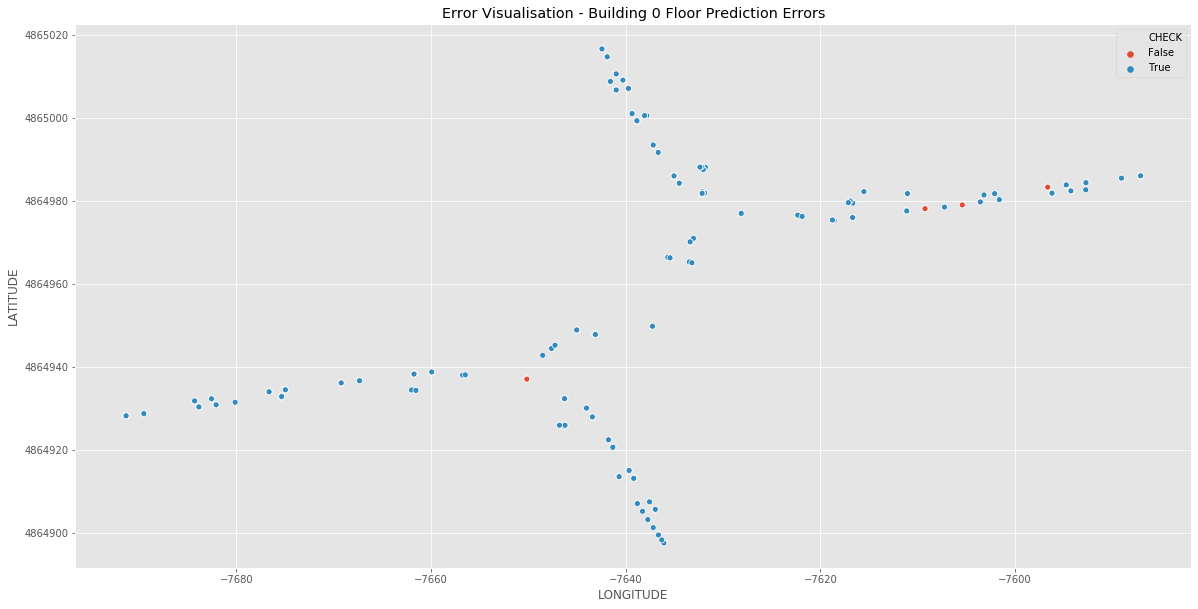

In [61]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [62]:
#### ----  MODEL ITERATION 2: DECISION TREE ---- ###

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.tree import DecisionTreeClassifier

## Apply Fit mathod to training data

clf = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)
clf.fit(X_train, y_train)

## Predicting the test set results
y_pred = clf.predict(X_test)

In [63]:
cm_dt = confusion_matrix(y_test, y_pred)
acc_dt = round(accuracy_score(y_test, y_pred), 4)
prec_dt = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_dt = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_dt = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [64]:
model_name = "Decision Tree"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_dt, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_dt,
      "\n\n", f"Precision is:\n",prec_dt,
      "\n\n", f"Recall is:\n",recall_dt,
      "\n\n", f"Cohen's Kappa is:\n", kappa_dt,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Decision Tree 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1       87        5        1        0
Floor 2        1      131        1        0
Floor 3        0        0      165        5
Floor 4        0        0        2      149 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9726 

 Precision is:
 0.9728 

 Recall is:
 0.9726 

 Cohen's Kappa is:
 0.9629 

-----------------------------------------------------



In [65]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
16760        2 -7635.6804  4.864966e+06        2            2   True
17597        3 -7616.6889  4.864976e+06        3            3   True
18241        0 -7636.9602  4.864906e+06        0            0   True
16701        2 -7636.0836  4.864898e+06        2            2   True
15832        1 -7596.6487  4.864983e+06        1            1   True
...        ...        ...           ...      ...          ...    ...
17608        3 -7636.6661  4.864992e+06        3            3   True
18411        2 -7641.8994  4.865015e+06        2            2   True
16006        3 -7638.2760  4.864905e+06        3            3   True
18203        3 -7674.9723  4.864934e+06        3            3   True
18070        1 -7635.4526  4.864966e+06        1            1   True

[547 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

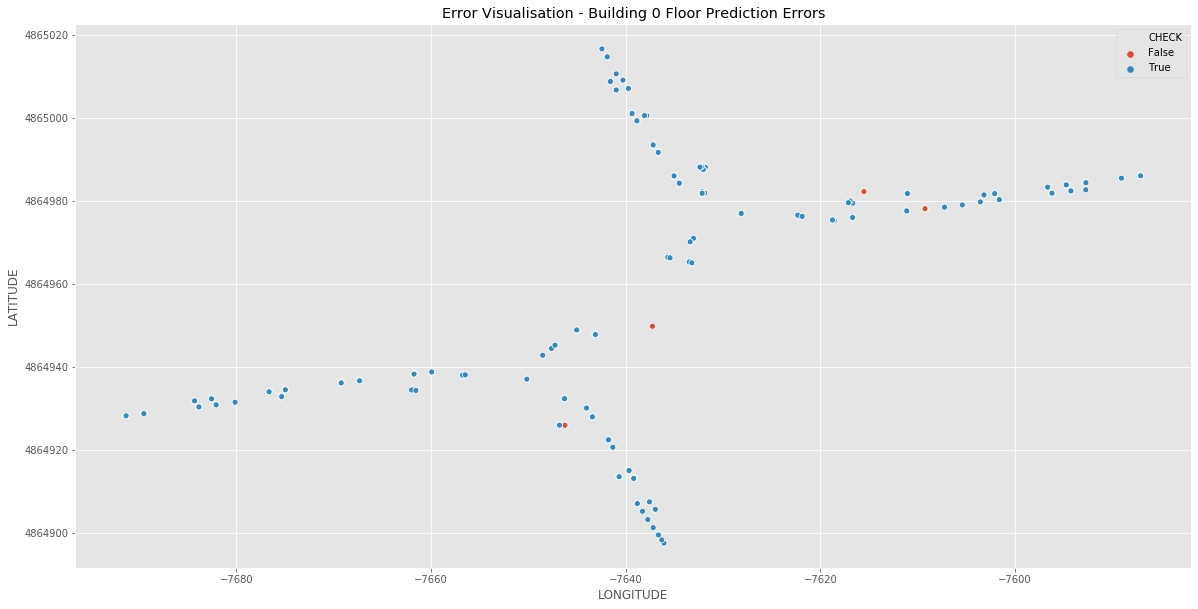

In [66]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [67]:
#### ----  MODEL ITERATION 3: K NEAREST NEIGHBOUR ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.neighbors import KNeighborsClassifier

## Apply Fit mathod to training data

classifier = KNeighborsClassifier (n_neighbors= 5)
classifier.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = classifier.predict(X_test)

In [68]:
cm_knn = confusion_matrix(y_test, y_pred)
acc_knn = round(accuracy_score(y_test, y_pred), 4)
prec_knn = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_knn = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_knn = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [69]:
model_name = "K Nearest Neighbour"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_knn, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_knn,
      "\n\n", f"Precision is:\n",prec_knn,
      "\n\n", f"Recall is:\n",recall_knn,
      "\n\n", f"Cohen's Kappa is:\n", kappa_knn,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for K Nearest Neighbour 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1       93        0        0        0
Floor 2        3      130        0        0
Floor 3        0        1      165        4
Floor 4        0        0        1      150 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 0.9835 

 Precision is:
 0.9838 

 Recall is:
 0.9835 

 Cohen's Kappa is:
 0.9778 

-----------------------------------------------------



In [70]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
16760        2 -7635.6804  4.864966e+06        2            2   True
17597        3 -7616.6889  4.864976e+06        3            3   True
18241        0 -7636.9602  4.864906e+06        0            0   True
16701        2 -7636.0836  4.864898e+06        2            2   True
15832        1 -7596.6487  4.864983e+06        1            1   True
...        ...        ...           ...      ...          ...    ...
17608        3 -7636.6661  4.864992e+06        3            3   True
18411        2 -7641.8994  4.865015e+06        2            2   True
16006        3 -7638.2760  4.864905e+06        3            3   True
18203        3 -7674.9723  4.864934e+06        3            3   True
18070        1 -7635.4526  4.864966e+06        1            1   True

[547 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

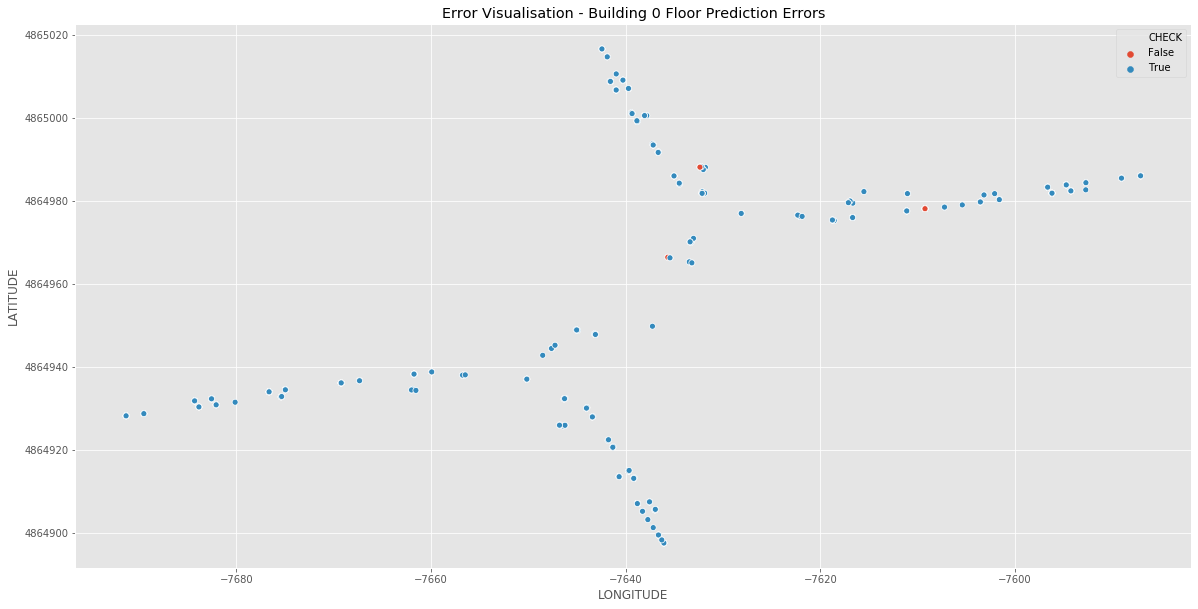

In [71]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [72]:
#### ----  MODEL ITERATION 4: RANDOM FOREST PART 2 RF ---- ####

#### ---- IMPORT THE SCIKITLEARN MODULES ---- ####

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Apply Fit mathod to training data

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

## Apply Predict Function to test data
y_pred = rf_clf.predict(X_test)

In [73]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [74]:
model_name = "Random Forest"
## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for", model_name,"\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Confusion Matrix is:\n\n", pd.DataFrame(cm_rf, 
                                                        columns = ("Floor 1", "Floor 2", "Floor 3", "Floor 4"), 
                                                         index =("Floor 1", "Floor 2", "Floor 3", "Floor 4")),"\n\n"
       "-----------------------------------------------------\n"
       "-----------------------------------------------------\n"
      "\n", f"Accuracy is:\n",acc_rf,
      "\n\n", f"Precision is:\n",prec_rf,
      "\n\n", f"Recall is:\n",recall_rf,
      "\n\n", f"Cohen's Kappa is:\n", kappa_rf,"\n\n"
       "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Random Forest 

-----------------------------------------------------

 The Confusion Matrix is:

          Floor 1  Floor 2  Floor 3  Floor 4
Floor 1       93        0        0        0
Floor 2        0      133        0        0
Floor 3        0        0      170        0
Floor 4        0        0        0      151 

-----------------------------------------------------
-----------------------------------------------------

 Accuracy is:
 1.0 

 Precision is:
 1.0 

 Recall is:
 1.0 

 Cohen's Kappa is:
 1.0 

-----------------------------------------------------



In [75]:
### ---- Creating the Error Visualisation Dataset ---- ###

### Step 1: Make a copy of y Test ###
tmp_y_test = pd.DataFrame(y_test).copy()
tmp_full_df = normed_df.copy()
### Step 2: Give the indexes from each DF a common name 'id' ###
tmp_y_test.index.name = 'id'
tmp_full_df.index.name = 'id'

### Step 3: Merge the Two Temporary DFs ###
merged_df = tmp_y_test.merge(tmp_full_df[['LONGITUDE', 'LATITUDE', 'FLOOR']], on='id', how='left')#, 'FLOOR'

### Step 4: Create a new column adding the Predicted Floor from y_pred ###
merged_df['PREDICTIONS'] = y_pred 

### Step 5: Add a check field as basis for chart ###
merged_df['CHECK'] = merged_df['FLOOR_y'] == merged_df['PREDICTIONS']

### Step 6: Verify this is all working ###
print("Table comparing Prediction Values from Actual Values:\n\n\n", merged_df)

Table comparing Prediction Values from Actual Values:


        FLOOR_x  LONGITUDE      LATITUDE  FLOOR_y  PREDICTIONS  CHECK
id                                                                  
16760        2 -7635.6804  4.864966e+06        2            2   True
17597        3 -7616.6889  4.864976e+06        3            3   True
18241        0 -7636.9602  4.864906e+06        0            0   True
16701        2 -7636.0836  4.864898e+06        2            2   True
15832        1 -7596.6487  4.864983e+06        1            1   True
...        ...        ...           ...      ...          ...    ...
17608        3 -7636.6661  4.864992e+06        3            3   True
18411        2 -7641.8994  4.865015e+06        2            2   True
16006        3 -7638.2760  4.864905e+06        3            3   True
18203        3 -7674.9723  4.864934e+06        3            3   True
18070        1 -7635.4526  4.864966e+06        1            1   True

[547 rows x 6 columns]


Text(0.5, 1.0, 'Error Visualisation - Building 0 Floor Prediction Errors')

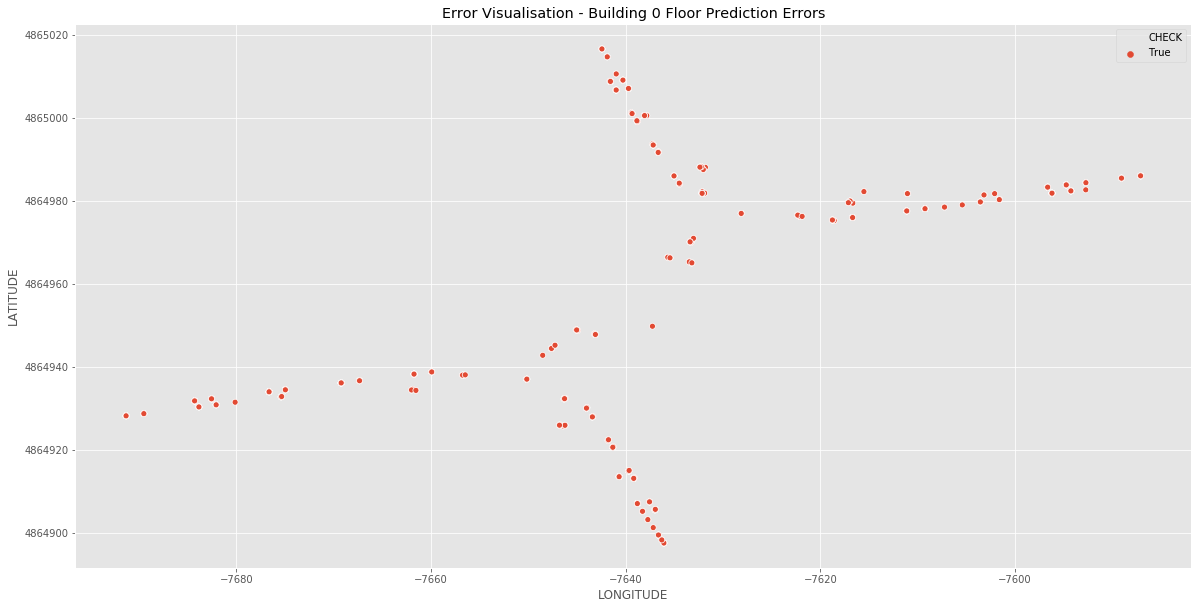

In [76]:
### ---- ERROR VISUALISATION --- ###

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='CHECK', data=merged_df, x_jitter=99, y_jitter=99) #y_merged_df
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Error Visualisation - Building 0 Floor Prediction Errors")

In [90]:
cm_rf = confusion_matrix(y_test, y_pred)
acc_rf = round(accuracy_score(y_test, y_pred), 4)
prec_rf = round(precision_score(y_test, y_pred, average='weighted'), 4)
recall_rf = round(recall_score(y_test, y_pred, average='weighted'), 4)
kappa_rf = round(cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None), 4)

In [91]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df = pd.DataFrame(
    { #"Confusion Matrix" : [cm_log, cm_dt, cm_knn, cm_rf],
      "Accuracy" : [acc_log, acc_dt, acc_knn, acc_rf],
      "Precision" : [prec_log, prec_dt, prec_knn, prec_rf],
      "Recall" : [recall_log, recall_dt, recall_knn, recall_rf],
      "Cohen's Kapa" : [kappa_log, kappa_dt, kappa_knn, kappa_rf]},
     index = ["Logistic Regression", "Decision Tree", "K Nearest Neighbour", "Random Forest"])

error_df

,Accuracy,Precision,Recall,Cohen's Kapa
Logistic Regression,0.9689,0.9696,0.9689,0.9580
Decision Tree,0.9726,0.9728,0.9726,0.9629
K Nearest Neighbour,0.9835,0.9838,0.9835,0.9778
Random Forest,1.0000,1.0000,1.0000,1.0000


In [92]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ERROR WISE COLUMNS---- ####

error_df_flat = pd.DataFrame(
    { "Logistic Regression" : [acc_log, prec_log, recall_log, kappa_log],
      "Decision Tree" : [acc_dt, prec_dt, recall_dt, kappa_dt],
      "K Nearest Neighbour" : [acc_knn, prec_knn, recall_knn, kappa_knn],
      "Random Forest" : [acc_rf, prec_rf, recall_rf, kappa_rf]},
     index = ["Accuracy", "Precision", "Recall", "Kappa"])

error_df_flat

,Logistic Regression,Decision Tree,K Nearest Neighbour,Random Forest
Accuracy,0.9689,0.9726,0.9835,1.0
Precision,0.9696,0.9728,0.9838,1.0
Recall,0.9689,0.9726,0.9835,1.0
Kappa,0.9580,0.9629,0.9778,1.0


Text(0.5, 1.0, 'Which Model shows best error metrics')

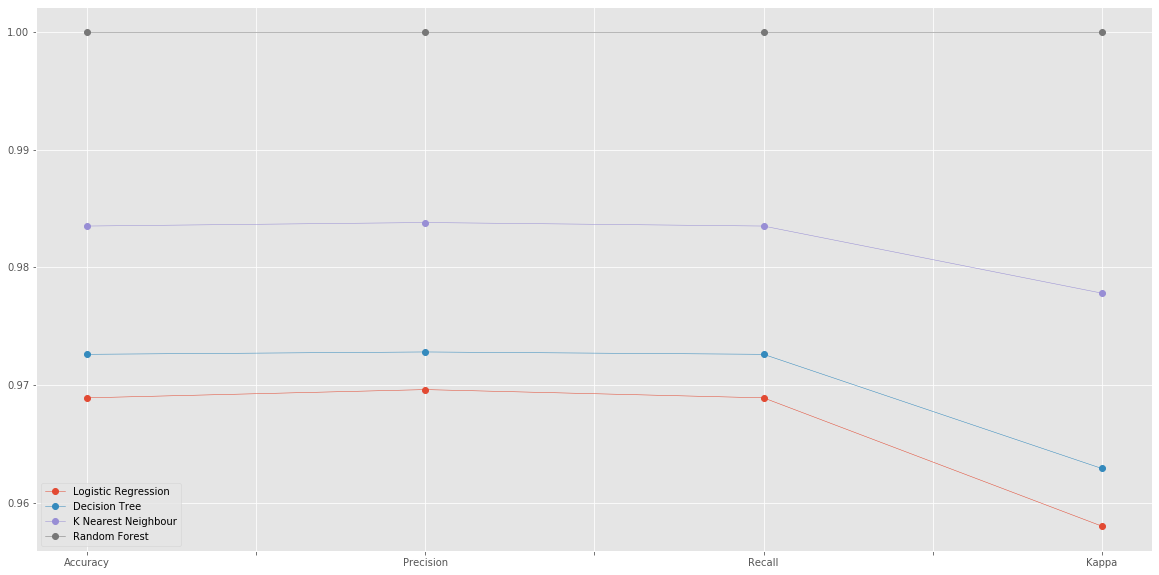

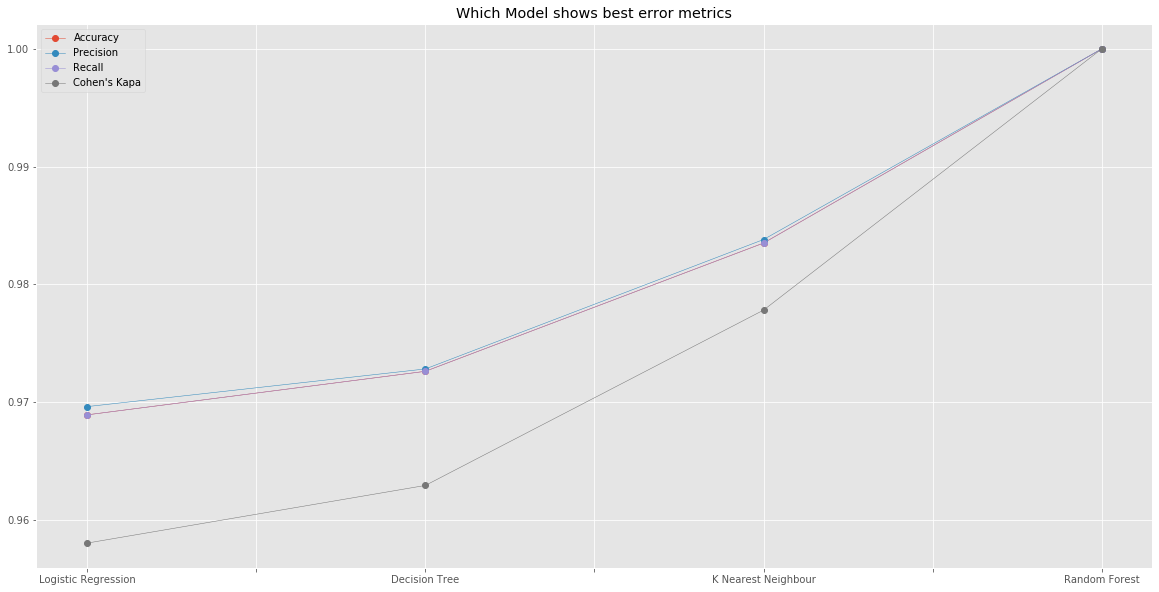

In [93]:
#### ---- VISUALISE ERROR COMPARISON TABLE ---- ####

error_df_flat.plot(marker="o", linewidth=0.5)
error_df.plot(marker="o", linewidth=0.5)
plt.title("Which Model shows best error metrics")